In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['axes.facecolor'] = (1,1,1,0)

In [4]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 125896 × 17390
    obs: 'knockout', 'line', 'mouse', 'condition', 'sample', 'batch', 'comb', 'n_counts', 'log_counts', 'n_genes', 'hbb_frac', 'ribo_frac', 'mt_frac', 'doublet_score', 'size_factors', 'log_genes', 'louvain_ref', 'louvain_r1', 'louvain_r0.5', 'S_score', 'G2M_score', 'phase', 'louvain_coarse', 'louvain_tmp'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'dendrogram_louvain_coarse', 'draw_graph', 'hvg', 'louvain', 'louvain_coarse_colors', 'louvain_r0.5_colors', 'louvain_r1_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_louvain_coarse', 'rank_genes_louvain_r0.5', 'sample_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata.obs.louvain_coarse.cat.categories

Index(['GABA', 'Cajal-Retzius', 'Granule Neuroblasts', 'NPCs', 'DG Glut 1',
       'DG Glut 2', 'Mossy Glut', 'CA1 Glut 1', 'CA1 Glut 2', 'CA1 Glut 3',
       'CA2 Glut', 'CA3 Glut 1', 'CA3 Glut 2', 'CA3 Glut 3', 'Astro 1',
       'Astro 2', 'OPCs', 'COPs', 'MFOLs', 'Oligodendrocytes', 'Microglia',
       'Macrophages 1', 'Macrophages 2', 'Ependymal', 'Pericytes',
       'Endothelial', 'Meningeal', 'Vascular', 'Choroid Plexus'],
      dtype='object')

In [7]:
adata.uns['louvain_coarse_colors'] = [
    '#ffd11a', #GABA
    '#993300', #Cajal
    '#33a7ff', #GN
    '#80c8ff', #NPC
    '#008ffb', #Dg1
    '#005799', #Dg2
    '#b3b3ff', #Mossy
    '#fed480', #CA11
    '#feb019', #Ca12
    '#cb8801', #CA13
    '#993366', #CA2
    '#ff4d67', #CA31
    '#ff0026', #CA32
    '#990017', #CA33
    '#8c75d7', #Astro1
    '#482e9e', #Astro2
    '#33ffbb', #OPC
    '#00e396', #COP
    '#009966', #MFOLs
    '#004d33', #OLIGO
    '#33cccc', #MICRO
    '#aaff00', #MACRO1
    '#669900', #MACRO2
    '#bb99ff', #EPENDY
    '#ff1afb', #PERI
    '#cc00c9', #ENDO
    '#330066', #MENING
    '#ff80fd', #VASC
    '#990000', #CHORO
]

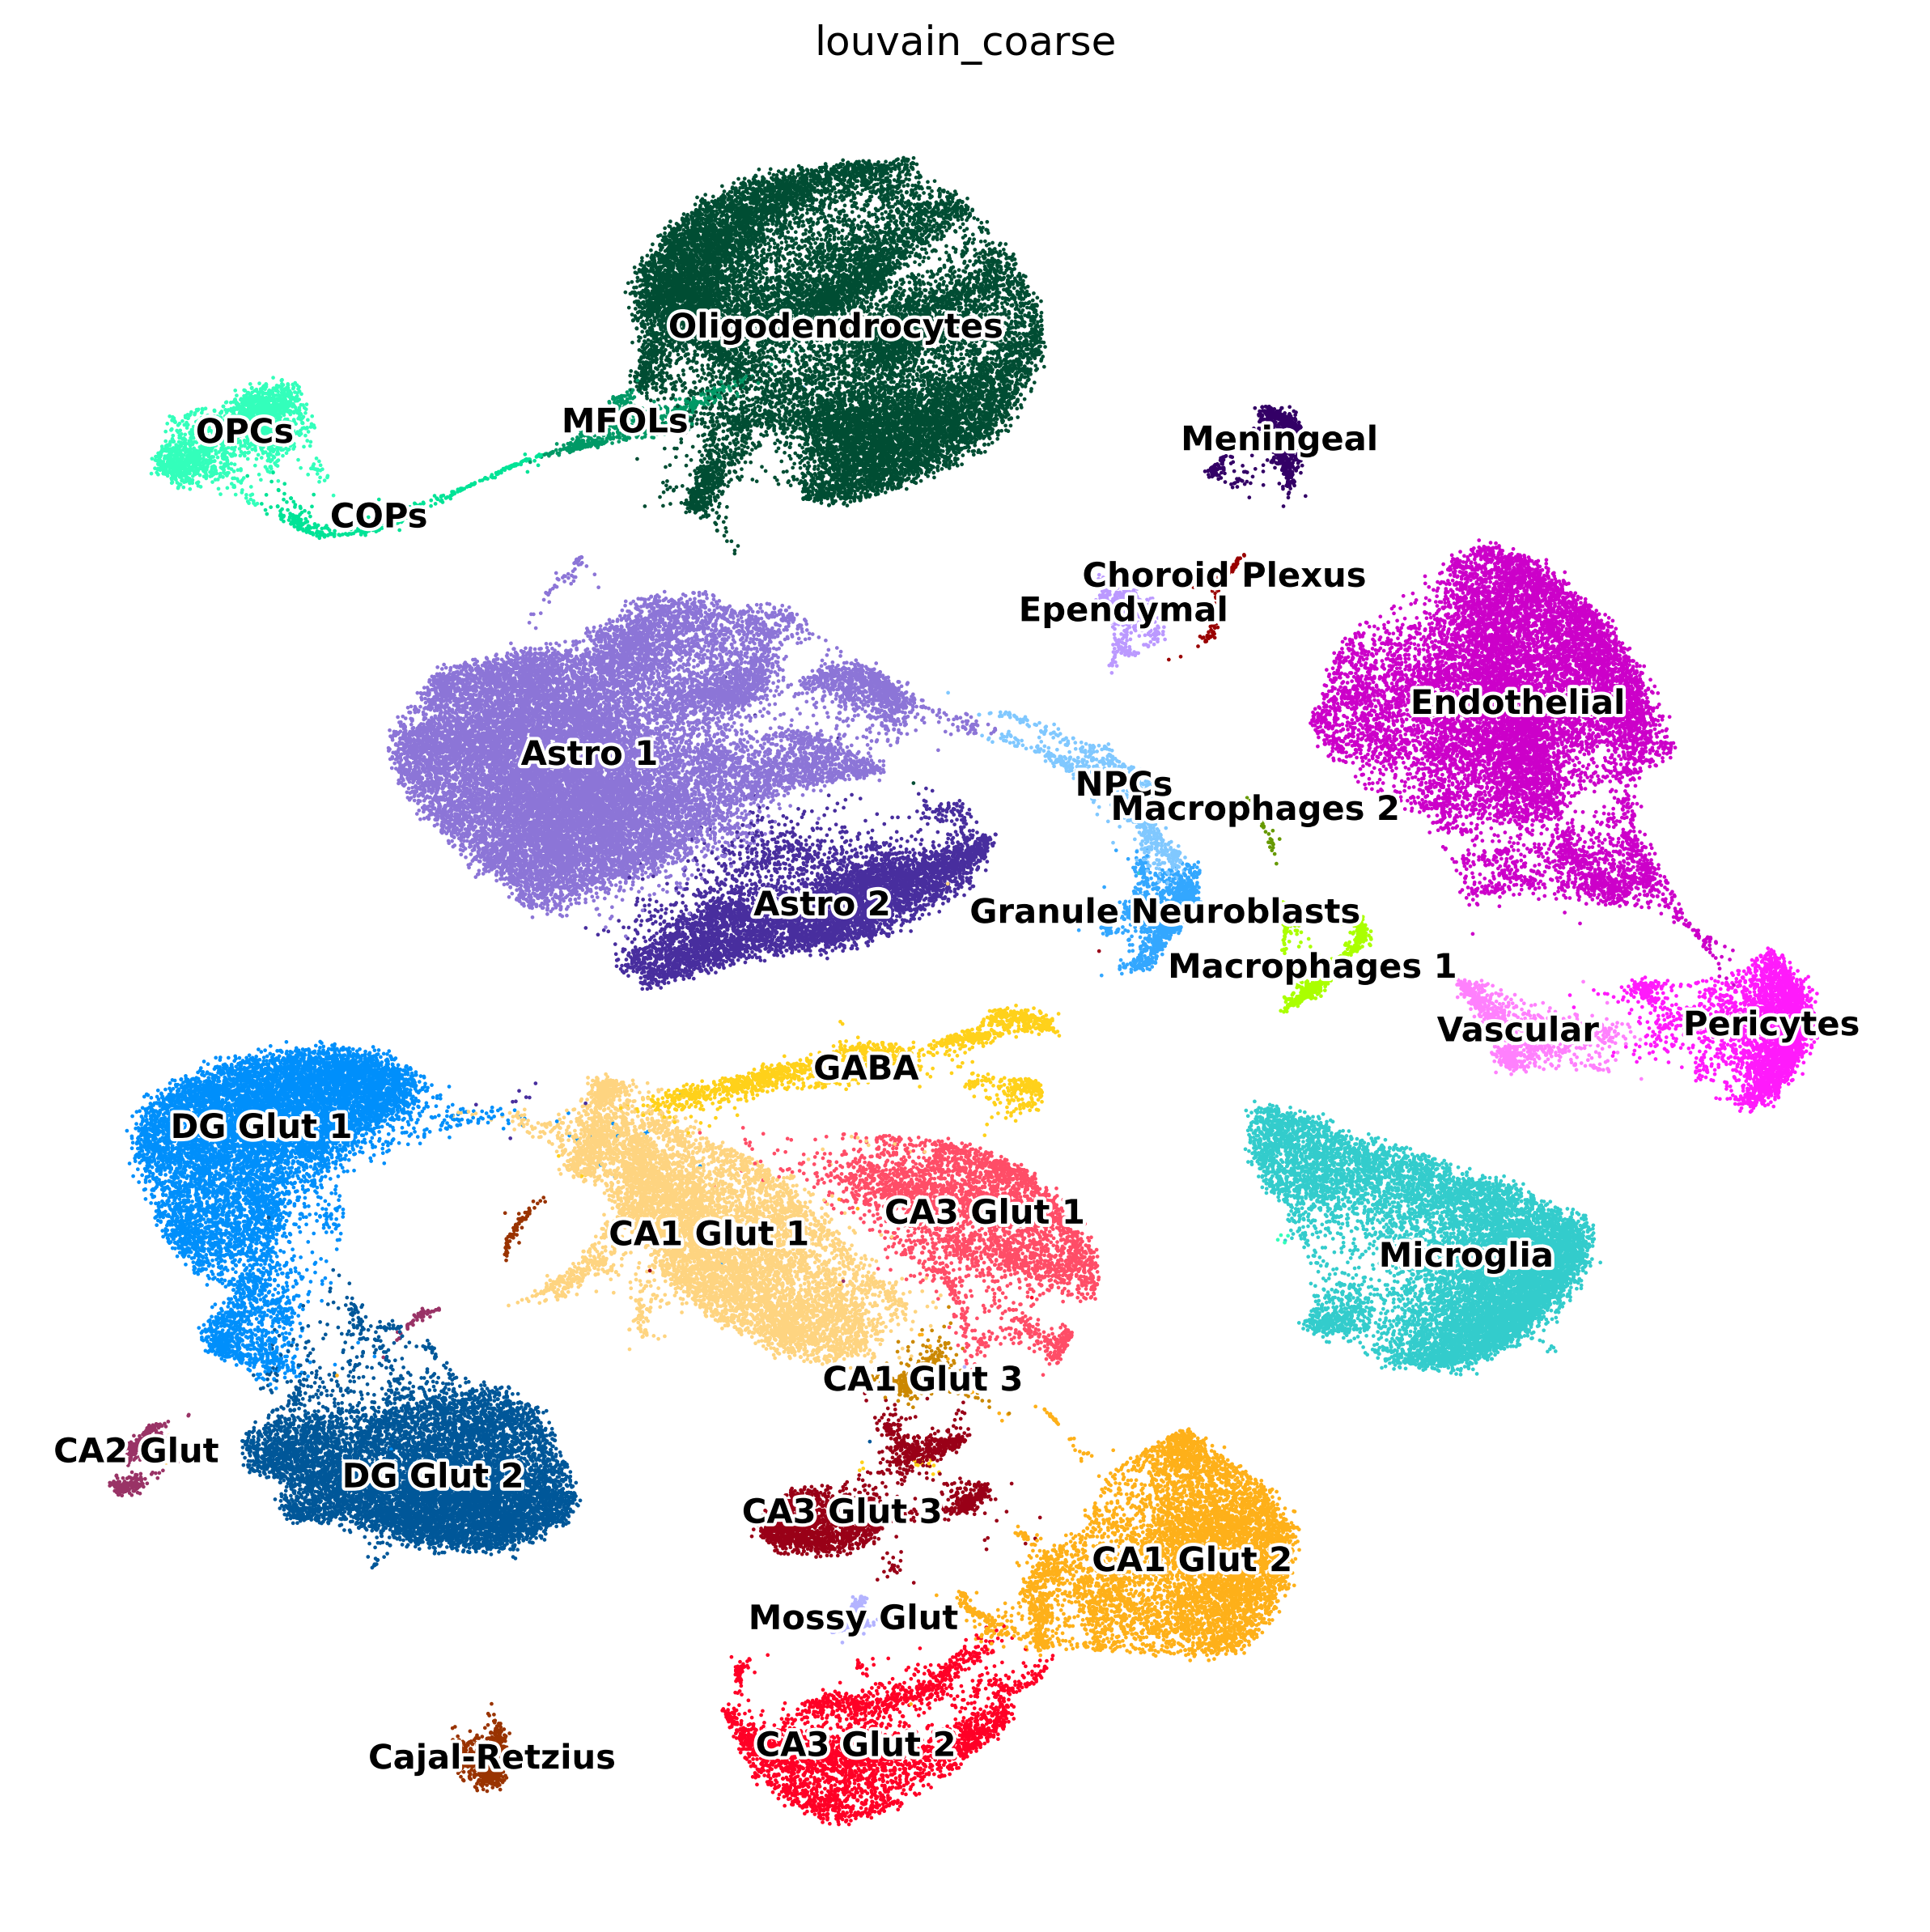

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 300
sc.pl.umap(
    adata,
    color='louvain_coarse',
    frameon=False,
    legend_loc='on data',
    legend_fontoutline=2,
    size=5
)

In [9]:
sc.tl.paga(adata, groups='louvain_coarse')

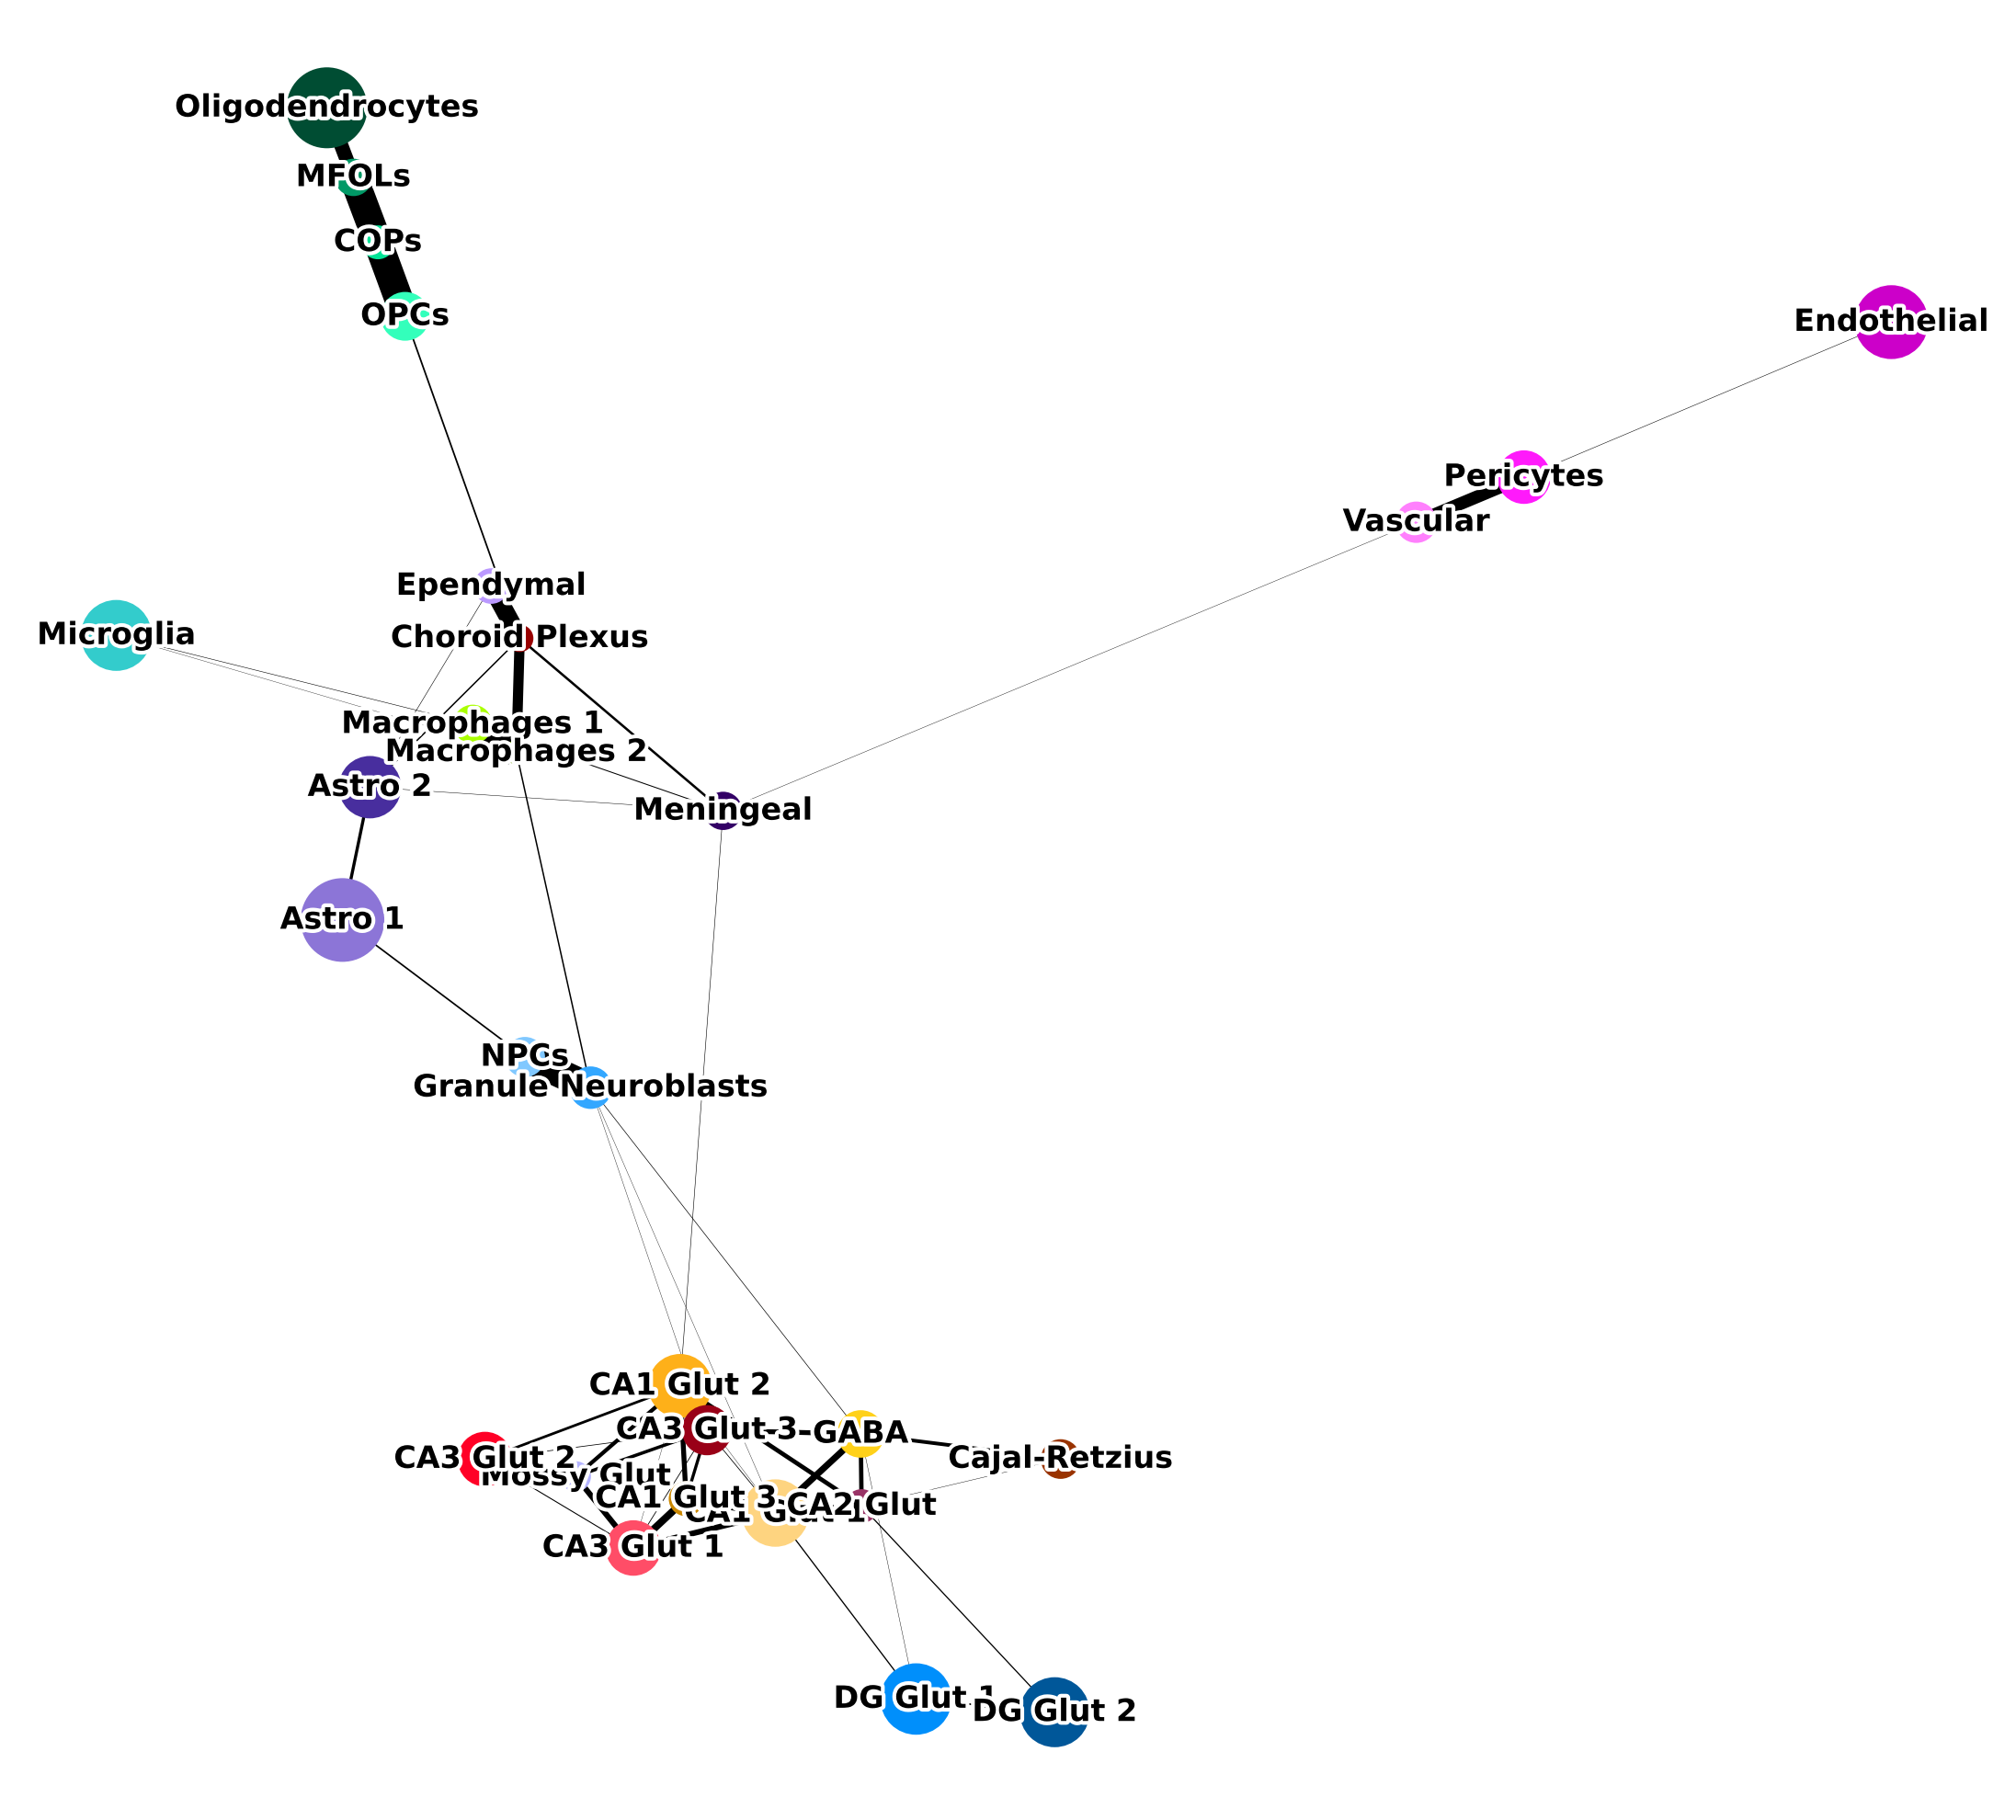

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 300
sc.pl.paga(
    adata,
    #color='louvain_coarse',
    frameon=False,
    #legend_loc='on data',
    fontoutline=2,
    fontsize=8,
    #size=5
)

Trying to set attribute `.uns` of view, copying.


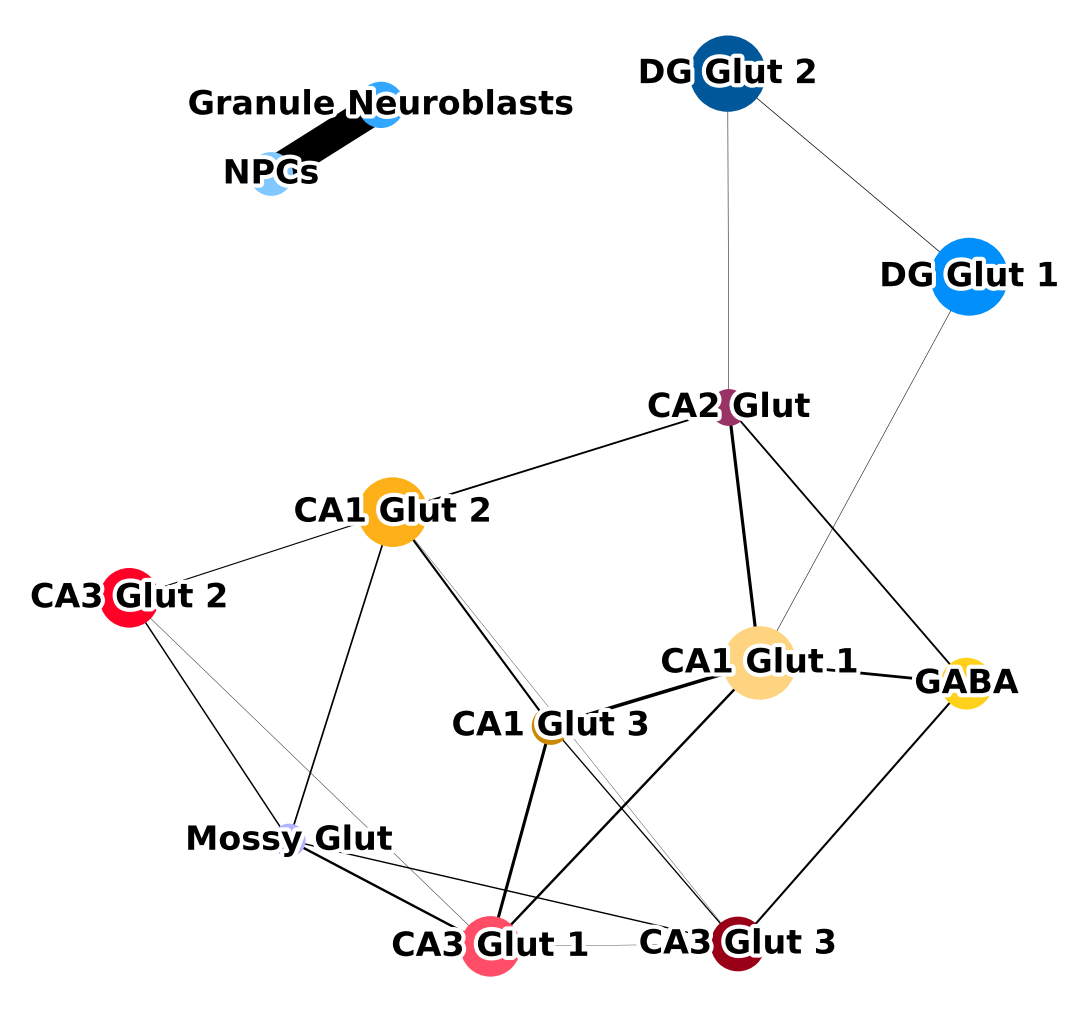

In [11]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 300
adata_neuro = adata[adata.obs['louvain_coarse'].str.contains('NPC|Glut|GABA|Neuro')]
sc.tl.paga(adata_neuro, groups='louvain_coarse')
sc.pl.paga(
    adata_neuro,
    #color='louvain_coarse',
    frameon=False,
    #legend_loc='on data',
    fontoutline=2,
    fontsize=8,
    #size=5
)

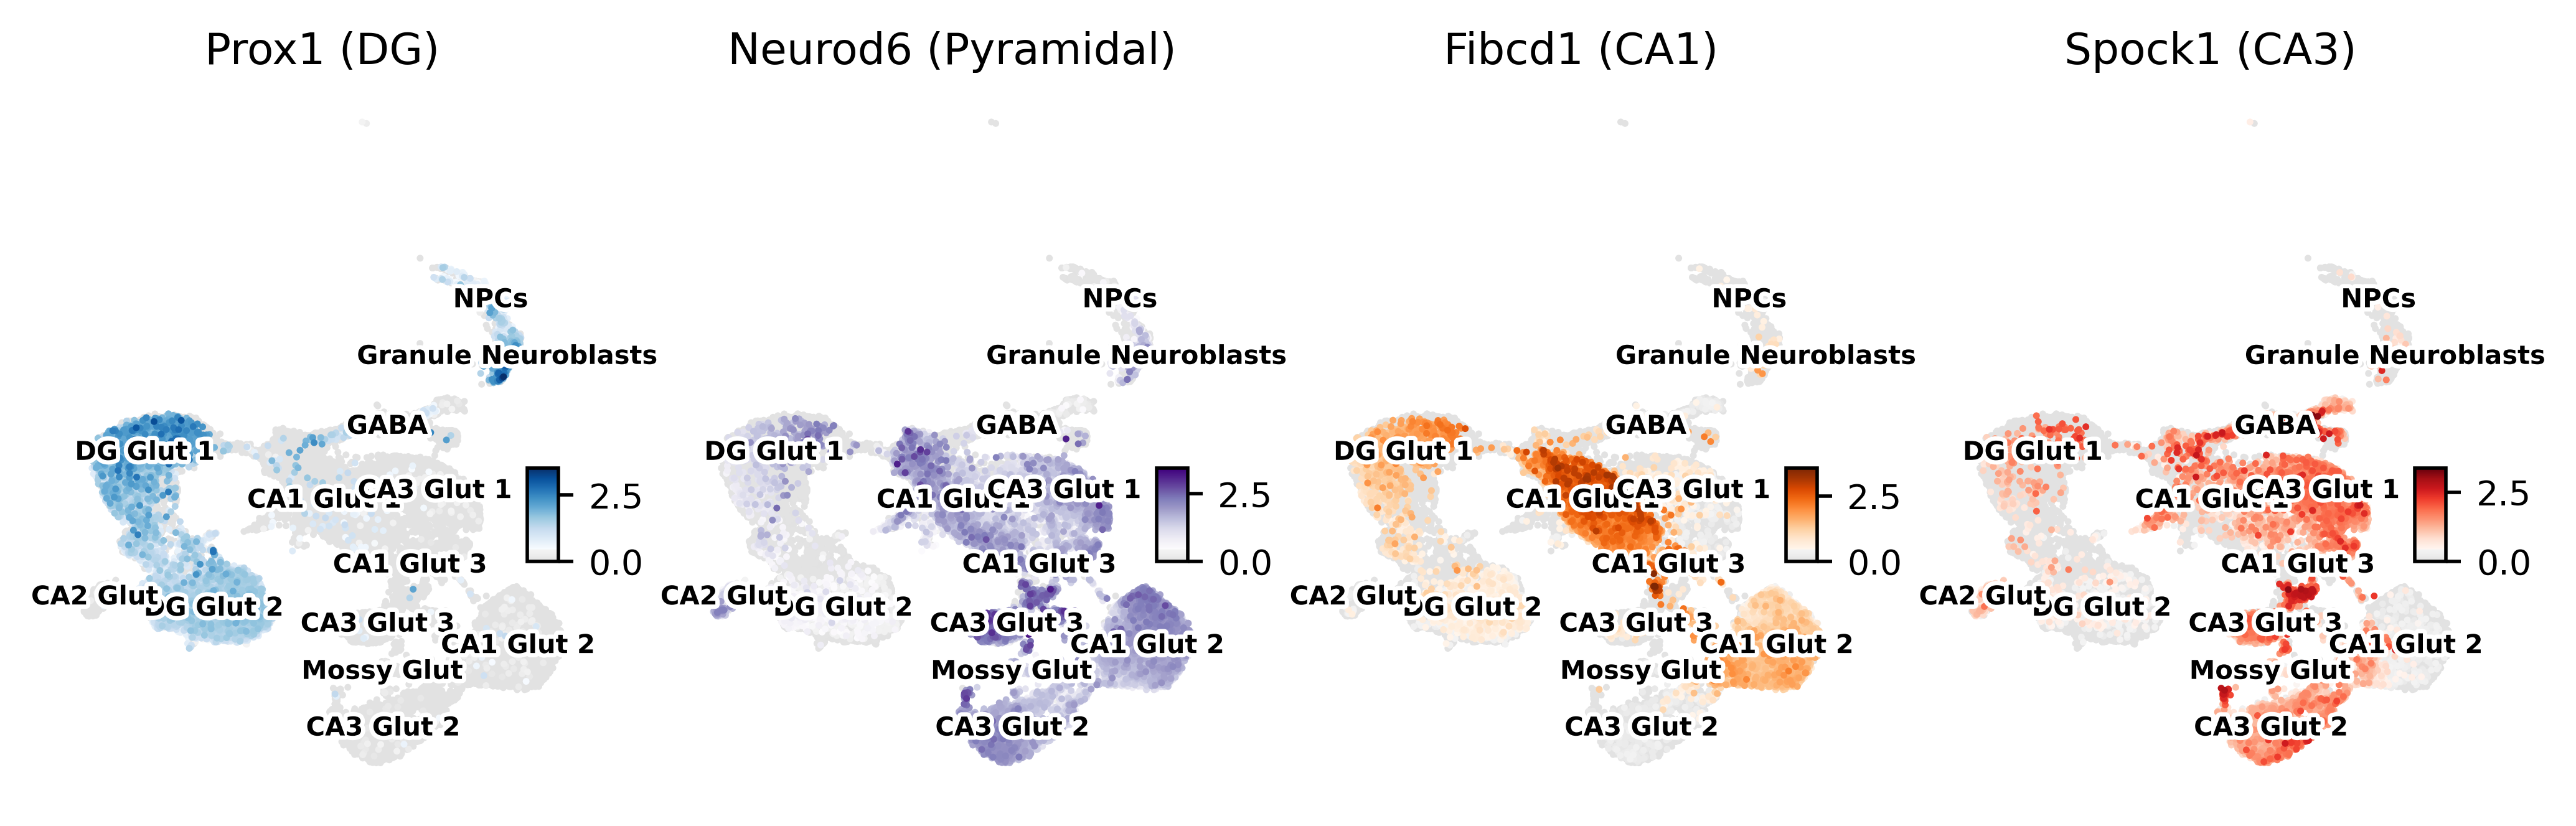

In [13]:
colors_grey = plt.cm.Greys_r(np.linspace(0.8,0.9,20))
colors_dg = plt.cm.Blues(np.linspace(0, 1, 128))
colors_ca = plt.cm.Purples(np.linspace(0, 1, 128))
colors_ca3 = plt.cm.Reds(np.linspace(0, 1, 128))
colors_ca1 = plt.cm.Oranges(np.linspace(0, 1, 128))
plt.rcParams['figure.dpi'] = 500
colors_comb = [
    np.vstack([colors_grey, colors_dg]),
    np.vstack([colors_grey, colors_ca]),
    np.vstack([colors_grey, colors_ca1]),
    np.vstack([colors_grey, colors_ca3])
]
mymap_list = [
    mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors_comb[i])
    for i in range(len(colors_comb))
]
adata_plot = adata[
    adata.obs.louvain_coarse.str.contains('CA|GABA|Glut|NPC|Neuro', regex=True)
]
genes = ['Prox1', 'Neurod6', 'Fibcd1', 'Spock1']
titles = ['DG', 'Pyramidal', 'CA1', 'CA3']

fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ax=ax.flatten()
for i, gene in enumerate(genes):
    col_vec = adata_plot.X[:, adata_plot.var_names==gene].squeeze()
    order = np.argsort(col_vec)
    p = ax[i].scatter(
        adata_plot.obsm['X_umap'][order, 0],
        adata_plot.obsm['X_umap'][order, 1],
        c=adata_plot.X[:, adata_plot.var_names==gene].squeeze()[order],
        cmap=mymap_list[i],
        marker='.',
        edgecolors='none',
        s=10,
        norm=col.Normalize(),
        rasterized=True
    )
    sc.pl.umap(
        adata_plot, 
        color='louvain_coarse',
        alpha=0,
        frameon=False, 
        legend_loc='on data',
        legend_fontoutline=2,
        legend_fontsize=6,
        ax=ax[i], 
        show=False, 
        #size=10,
    )
    ax[i].axis('off')
    ax[i].set_title(f'{gene} ({titles[i]})', fontsize=10)
    pos1 = ax[i].get_position()
    cbax = fig.add_axes([pos1.x0+0.15, pos1.y0+0.25, 0.01, 0.1])
    cbar = plt.colorbar(p, cax=cbax)
    cbar.ax.tick_params(labelsize=8)


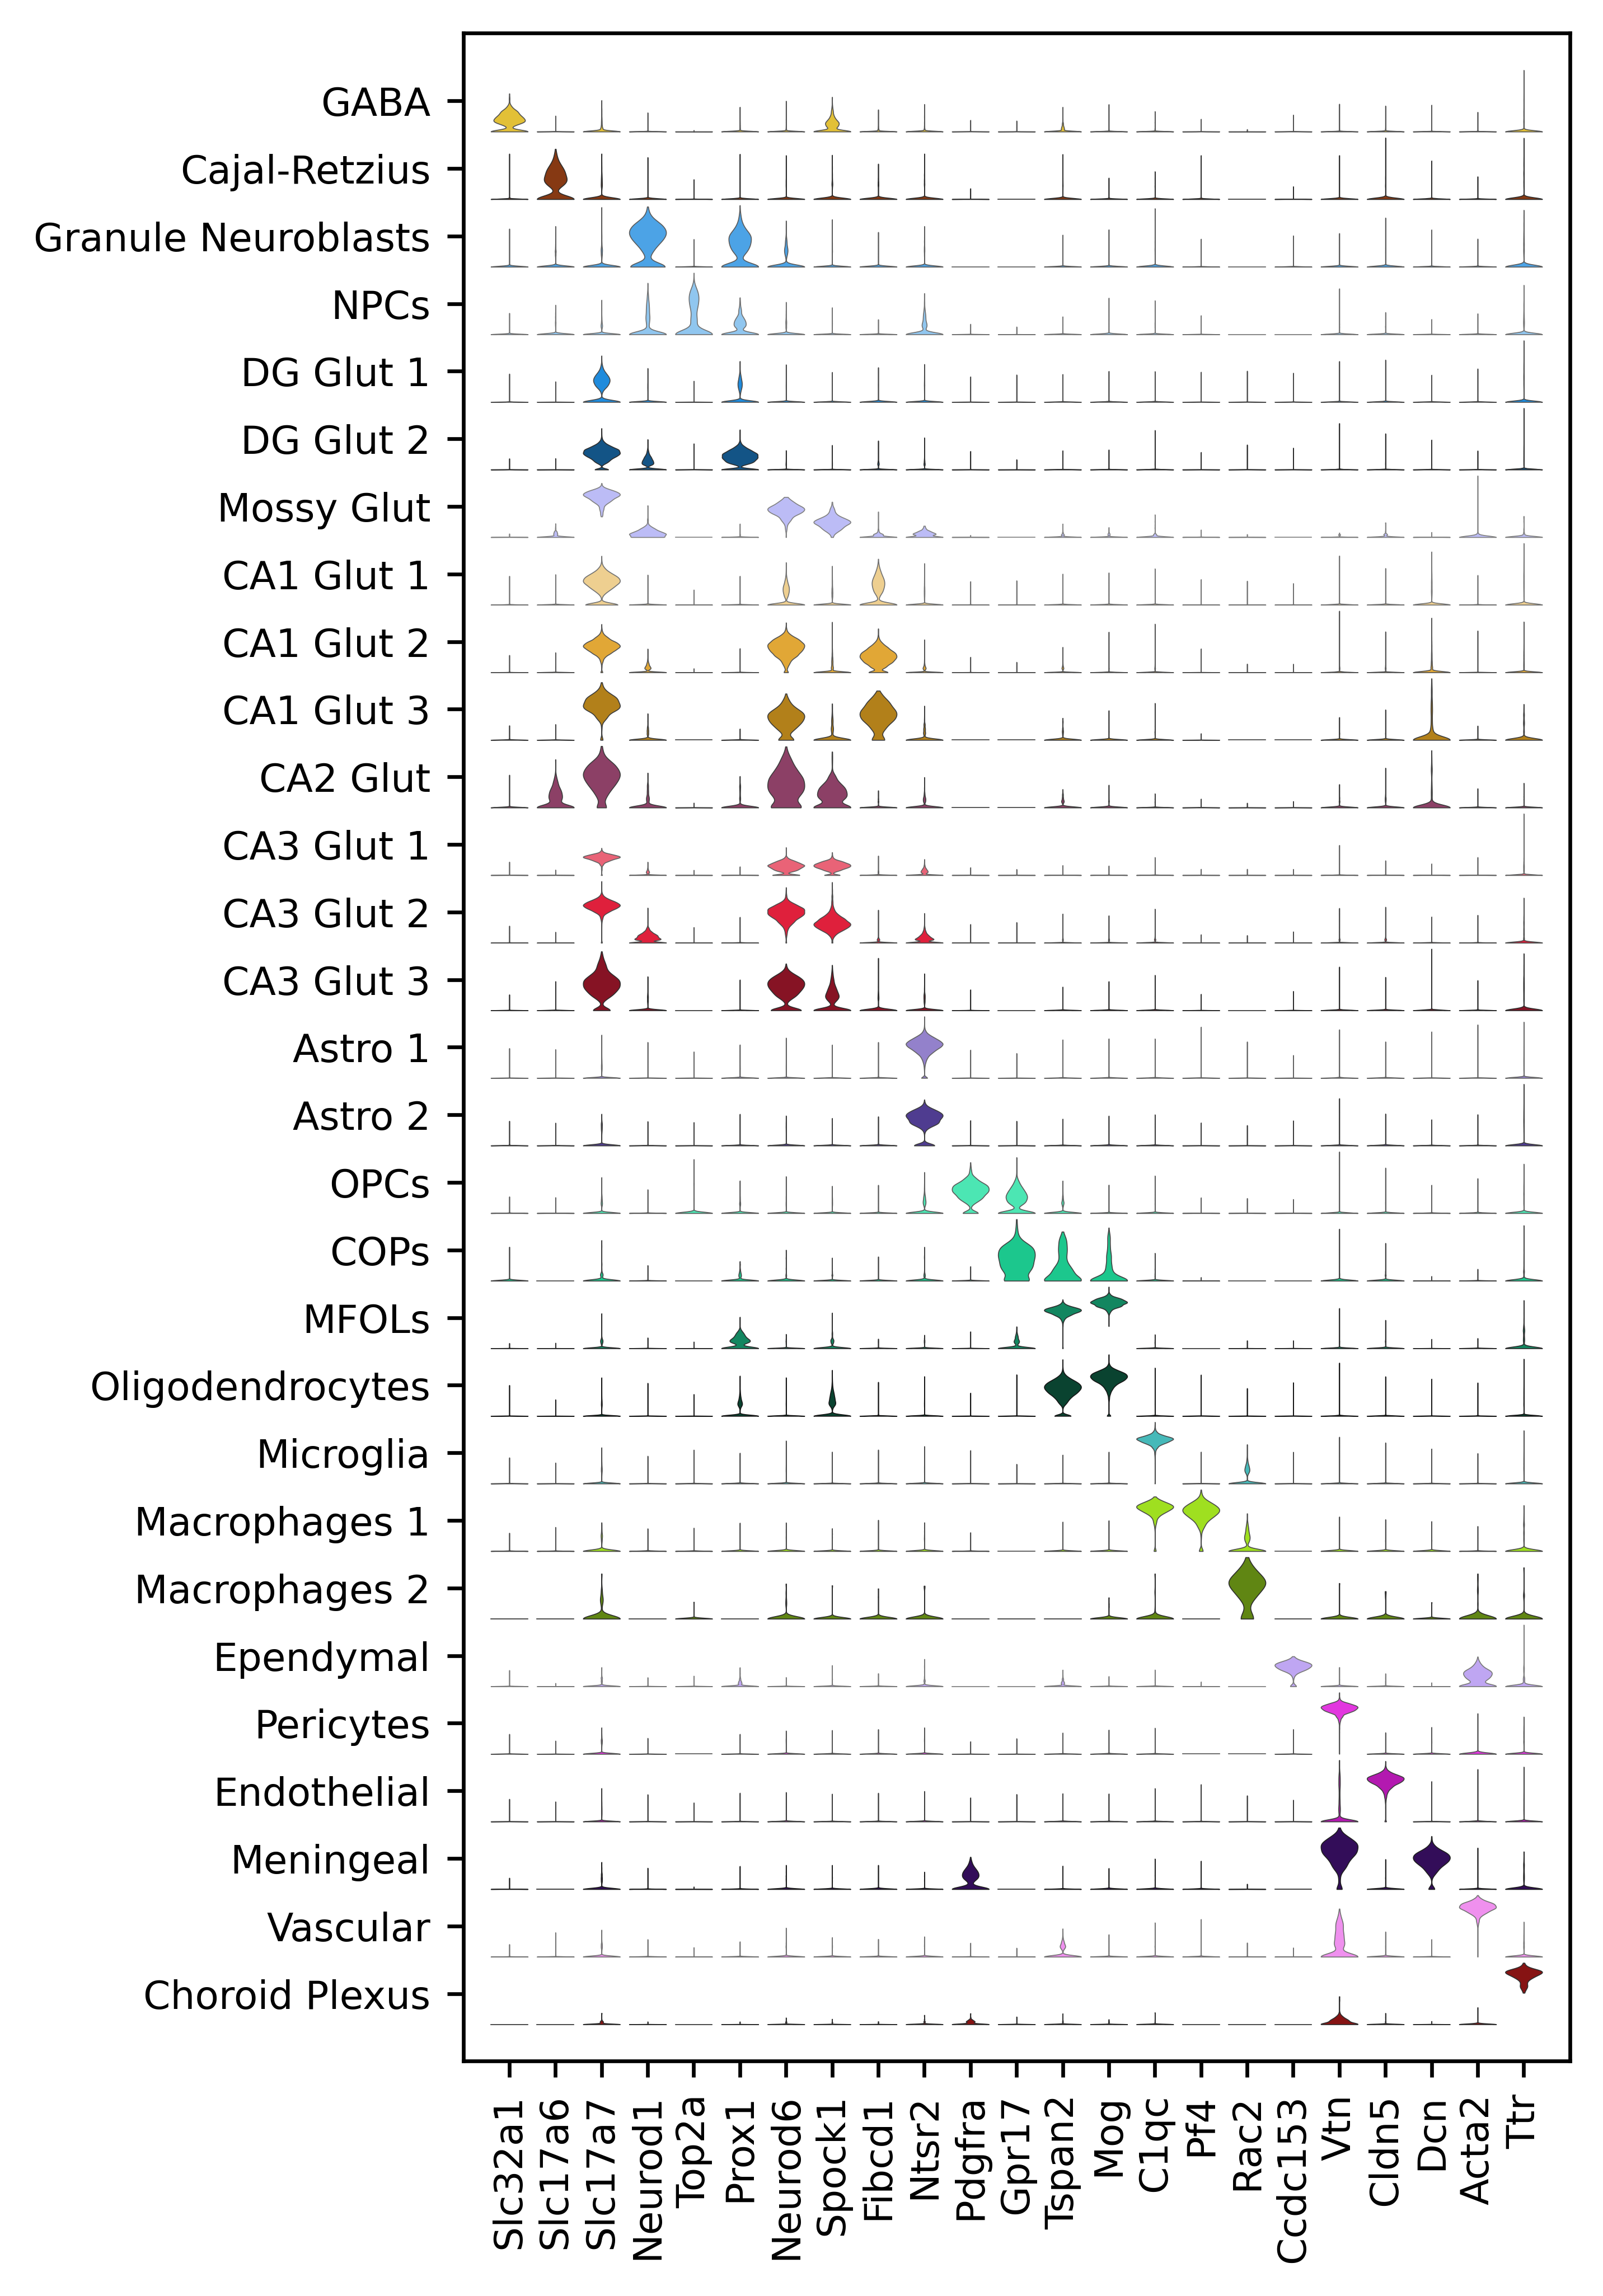

In [14]:
markers = [
    'Slc32a1',
    'Slc17a6',
    'Slc17a7',
    'Neurod1',
    'Top2a',
    'Prox1',
    'Neurod6',
    'Spock1',
    'Fibcd1',
    'Ntsr2',
    'Pdgfra',
    'Gpr17',
    'Tspan2',
    'Mog',
    'C1qc',
    'Pf4',
    'Rac2',
    'Ccdc153',
    'Vtn',
    'Cldn5',
    'Dcn',
    'Acta2',
    'Ttr',
]
plt.rcParams['figure.dpi'] = 600
sc.pl.stacked_violin(
    adata, 
    markers, 
    groupby='louvain_coarse', 
    swap_axes=False,
    dendrogram=False,
    row_palette=adata.uns['louvain_coarse_colors'],
    figsize=(6, 8)
)

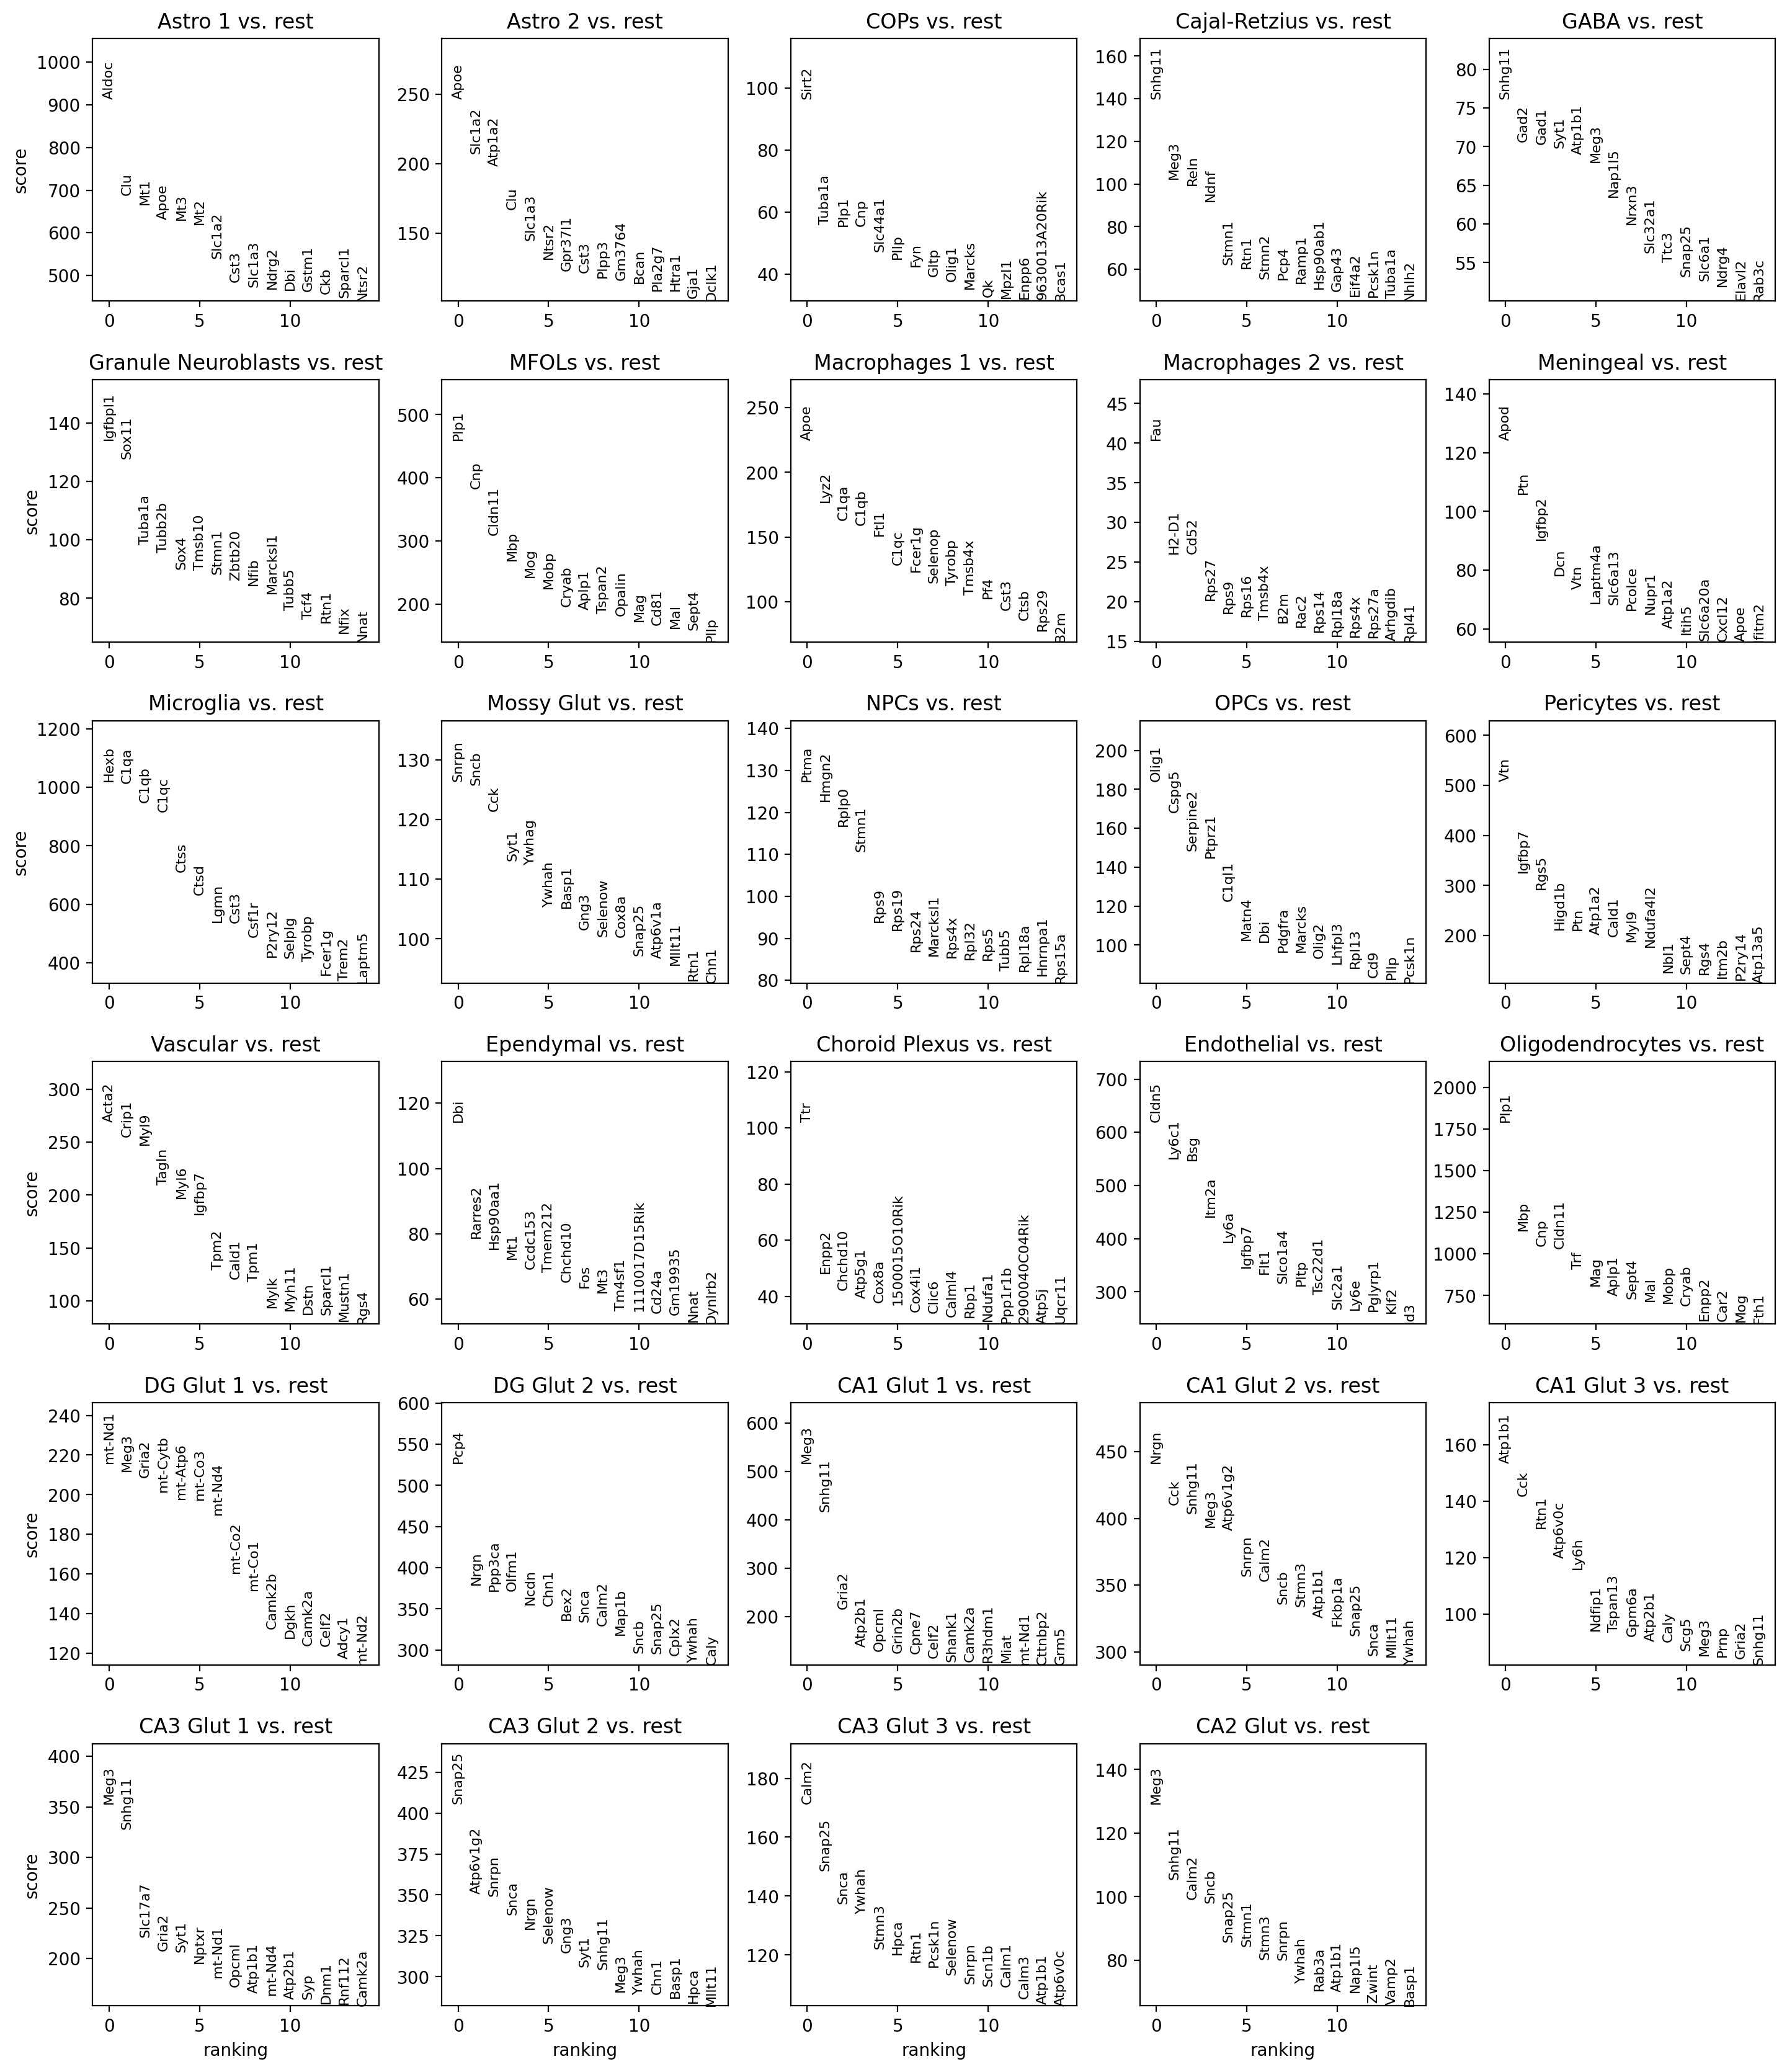

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (3.5, 3.5)
sc.pl.rank_genes_groups(adata, key='rank_genes_louvain_coarse', ncols=5, n_genes=15, sharey=False)

In [16]:
adata.uns['louvain_coarse_colors_dict'] = {
    'GABA' :'#ffd11a',
    'Cajal-Retzius': '#993300', #Cajal
    'Granule Neuroblasts': '#33a7ff', #GN
    'NPCs': '#80c8ff', #NPC
    'DG Glut 1': '#008ffb', #Dg1
    'DG Glut 2': '#005799', #Dg2
    'Mossy Glut': '#b3b3ff', #Mossy
    'CA1 Glut 1': '#fed480', #CA11
    'CA1 Glut 2': '#feb019', #Ca12
    'CA1 Glut 3': '#cb8801', #CA13
    'CA2 Glut': '#993366', #CA2
    'CA3 Glut 1': '#ff4d67', #CA31
    'CA3 Glut 2': '#ff0026', #CA32
    'CA3 Glut 3': '#990017', #CA33
    'Astro 1': '#8c75d7', #Astro1
    'Astro 2': '#482e9e', #Astro2
    'OPCs': '#33ffbb', #OPC
    'COPs': '#00e396', #COP
    'MFOLs': '#009966', #MFOLs
    'Oligodendrocytes': '#004d33', #OLIGO
    'Microglia': '#33cccc', #MICRO
    'Macrophages 1': '#aaff00', #MACRO1
    'Macrophages 2': '#669900', #MACRO2
    'Ependymal': '#bb99ff', #EPENDY
    'Pericytes': '#ff1afb', #PERI
    'Endothelial': '#cc00c9', #ENDO
    'Meningeal': '#330066', #MENING
    'Vascular': '#ff80fd', #VASC
    'Choroid Plexus': '#990000', #CHORO
}

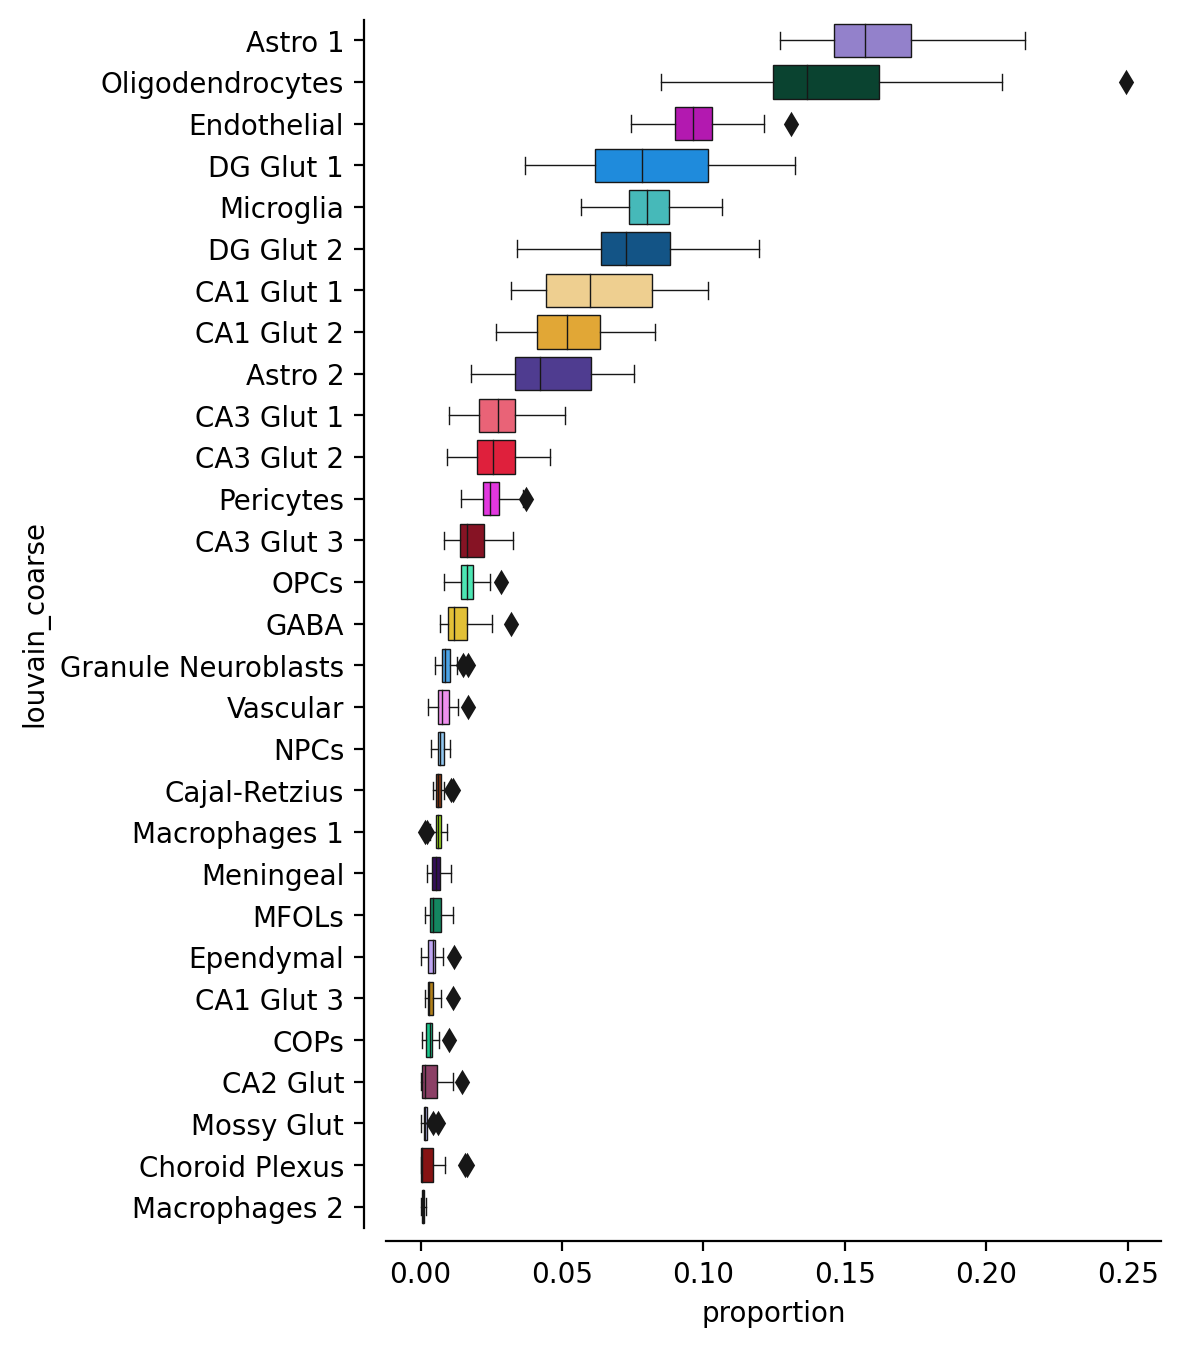

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
plot_data = (
    adata
    .obs
    .groupby('louvain_coarse')
    ['sample']
    .value_counts()
    .sort_values()
)
df = pd.DataFrame(plot_data)
df['louvain_coarse'] = df.index.get_level_values(0)
df['sample_id'] = df.index.get_level_values(1)
sample_sizes = pd.DataFrame(
    adata.obs.groupby('sample').size()
)
df['proportion'] = [
    df['sample'].iloc[i]
    / sample_sizes.loc[df['sample_id'].iloc[i]].values[0]
    for i in range(len(df))
]
order = adata.obs.groupby(['louvain_coarse']).size().sort_values(ascending=False).index
sns.boxplot(
    y='louvain_coarse', 
    x='proportion', 
    orient='h', 
    data=df, 
    ax=ax,
    palette=[adata.uns['louvain_coarse_colors_dict'][key] for key in order],
    linewidth=0.5,
    order=order
)
set_axis_style(ax)

In [19]:
adata.obs['louvain_coarser'] = adata.obs.louvain_coarse.astype(str).copy()
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('DG|NPCs|Granule')] = 'DG Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA1')] = 'CA1 Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA3')] = 'CA3 Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('CA2|Cajal|GABA|Glut')] = 'Other Neurons'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('OPC|COP|MFOLs|Oligo')] = 'Oligo'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('Astro')] = 'Astro'
adata.obs['louvain_coarser'][adata.obs.louvain_coarser.str.contains('Pericytes|Ependymal|Choroid|Vasc|Mening|Macro')] = 'Other (Glia)'
adata.obs.louvain_coarser = adata.obs.louvain_coarser.astype('category')

adata.uns['louvain_coarser_colors_dict'] = {
    'Astro': '#8c75d7', #Astro 2
    'CA1 Neurons': '#feb019', #CA1 2
    'CA3 Neurons': '#ff0026', #CA3 2
    'DG Neurons': '#005799', #DG 2
    'Endothelial': '#cc00c9', #Endo
    'Microglia': '#33cccc', #Microglia
    'Oligo': '#009966', #Oligo
    'Other (Glia)': '#669900', #other glia
    'Other Neurons': '#b3b3ff', #other neur
}
adata.uns['louvain_coarser_colors'] = list(adata.uns['louvain_coarser_colors_dict'].values())

Text(0, 0.5, '')

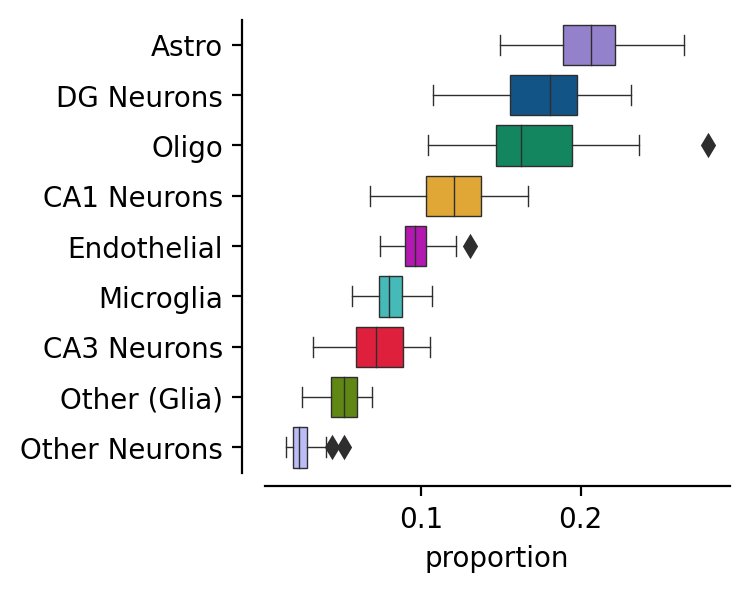

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_data = (
    adata
    .obs
    .groupby('louvain_coarser')
    ['sample']
    .value_counts()
    .sort_values()
)
df = pd.DataFrame(plot_data)
df['louvain_coarser'] = df.index.get_level_values(0)
df['sample_id'] = df.index.get_level_values(1)
sample_sizes = pd.DataFrame(
    adata.obs.groupby('sample').size()
)
df['proportion'] = [
    df['sample'].iloc[i]
    / sample_sizes.loc[df['sample_id'].iloc[i]].values[0]
    for i in range(len(df))
]
order = adata.obs.groupby(['louvain_coarser']).size().sort_values(ascending=False).index
sns.boxplot(
    y='louvain_coarser', 
    x='proportion', 
    orient='h', 
    data=df, 
    ax=ax,
    palette=[adata.uns['louvain_coarser_colors_dict'][key] for key in order],
    linewidth=0.5,
    order=order
)
set_axis_style(ax)
ax.set_ylabel('')

In [21]:
adata.obs.groupby('louvain_coarser').size()/len(adata) * 100

louvain_coarser
Astro            20.966512
CA1 Neurons      12.121910
CA3 Neurons       7.369575
DG Neurons       17.588327
Endothelial       9.608725
Microglia         8.105103
Oligo            16.593061
Other (Glia)      5.008102
Other Neurons     2.638686
dtype: float64

In [21]:
adata.obs['louvain_coarsest'] = adata.obs.louvain_coarse.astype(str).copy()
adata.obs['louvain_coarsest'][adata.obs.louvain_coarsest.str.contains('Glut|NPCs|Granule|GABA|Cajal')] = 'Neurons'
adata.obs['louvain_coarsest'][adata.obs.louvain_coarsest.str.contains('OPC|COP|MFOLs|Oligo|Astro|Micro|Macro')] = 'Glia'
adata.obs['louvain_coarsest'][adata.obs.louvain_coarsest.str.contains('Pericytes|Ependymal|Choroid|Vasc|Mening|Endo')] = 'Vascular'
adata.obs.louvain_coarsest = adata.obs.louvain_coarsest.astype('category')

In [22]:
adata.obs.groupby('louvain_coarsest').size()/len(adata) * 100

louvain_coarsest
Glia        46.345396
Neurons     39.718498
Vascular    13.936106
dtype: float64

In [23]:
adata.obs.groupby('louvain_coarse').size()/len(adata) * 100

louvain_coarse
GABA                    1.455169
Cajal-Retzius           0.658480
Granule Neuroblasts     0.893595
NPCs                    0.698195
DG Glut 1               8.345777
DG Glut 2               7.650759
Mossy Glut              0.202548
CA1 Glut 1              6.533170
CA1 Glut 2              5.217799
CA1 Glut 3              0.370941
CA2 Glut                0.322488
CA3 Glut 1              2.851560
CA3 Glut 2              2.675224
CA3 Glut 3              1.842791
Astro 1                16.267395
Astro 2                 4.699117
OPCs                    1.634683
COPs                    0.326460
MFOLs                   0.505179
Oligodendrocytes       14.126740
Microglia               8.105103
Macrophages 1           0.615587
Macrophages 2           0.065133
Ependymal               0.404302
Pericytes               2.445669
Endothelial             9.608725
Meningeal               0.562369
Vascular                0.792718
Choroid Plexus          0.122323
dtype: float64

In [14]:
df = (
    adata[(adata.obs.line=='Ctrl') & (adata.obs.condition=='No Stress')]
    .obs[['louvain_coarse', 'sample']]
    .groupby('sample')['louvain_coarse']
    .value_counts()
    .unstack('louvain_coarse')
)
df = pd.DataFrame(df)
df = df.div(df.sum(axis=1), axis=0)